<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/Codealong1_loops_and_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Review lists
# Intialize an empty list
l = []
# Append values to a list
l.append(45)
l.append(30)
print(l)

[45, 30]


In [3]:
# Review for loop
# for loop in a list
for item in l:
  print(item)

# executing for loop a se number of times
for i in range(10):
  print("Repeatable task")

45
30
Repeatable task
Repeatable task
Repeatable task
Repeatable task
Repeatable task
Repeatable task
Repeatable task
Repeatable task
Repeatable task
Repeatable task


In [4]:
# Convert list to numpy array for easy math
np.array(l)

array([45, 30])

In [5]:
# Reading a dataframe from a csv file
cal = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [6]:
# Taking a sample from a dataframe of size n
cal.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8038,-118.42,34.18,30.0,1323.0,353.0,856.0,333.0,3.3594,202200.0
3910,-117.95,33.63,17.0,6745.0,1547.0,2688.0,1535.0,3.9917,271600.0
12971,-121.85,39.77,17.0,5273.0,1177.0,2446.0,1199.0,1.9362,89900.0
11511,-121.26,38.11,8.0,2770.0,642.0,1611.0,633.0,3.1284,115100.0
7393,-118.35,34.04,45.0,1579.0,357.0,713.0,335.0,2.1711,179200.0


In [13]:
# sample of the same size as the data frame (bootstrap replicate)
cal_bs_rep = cal.sample(frac=1.0,replace = True)
print("Re-Sample with replacement has shape ",cal_bs_rep.shape)
print("Original datae shape ", cal.shape)
print("Cal original median population ", cal.population.median())
print("Re-Sample median population ", cal_bs_rep.population.median())

Re-Sample with replacement has shape  (17000, 9)
Original datae shape  (17000, 9)
Cal original median population  1167.0
Re-Sample median population  1169.0


### Coding problem
* Now lets repeatedly sample the cal dataset with replacement.
* Calculate the median population
* Find out what range the median population value is 95% of the time <br>
For this we use the concepts of loops to repeatedly sample a pandas data frame, calculate the median population for each sample and store the result in a list. From this list we can calculate a 95% confidence interval

In [20]:
# first we set the number of times we want to resample and store in sims
sims = 10000
# Intialize an empty list to store the results
l = []
# Now we iterate sims number of times using the range syntax that we saw earlier
for i in range(sims):
  # sample cal with replacement
  cal_bs = cal.sample(frac=1.0, replace = True)
  # Calculate median for the replicate/resample
  median_pop = cal_bs.population.median()
  l.append(median_pop)
# Outside the loop convert list l into numpy array for easy math
l_np = np.array(l)

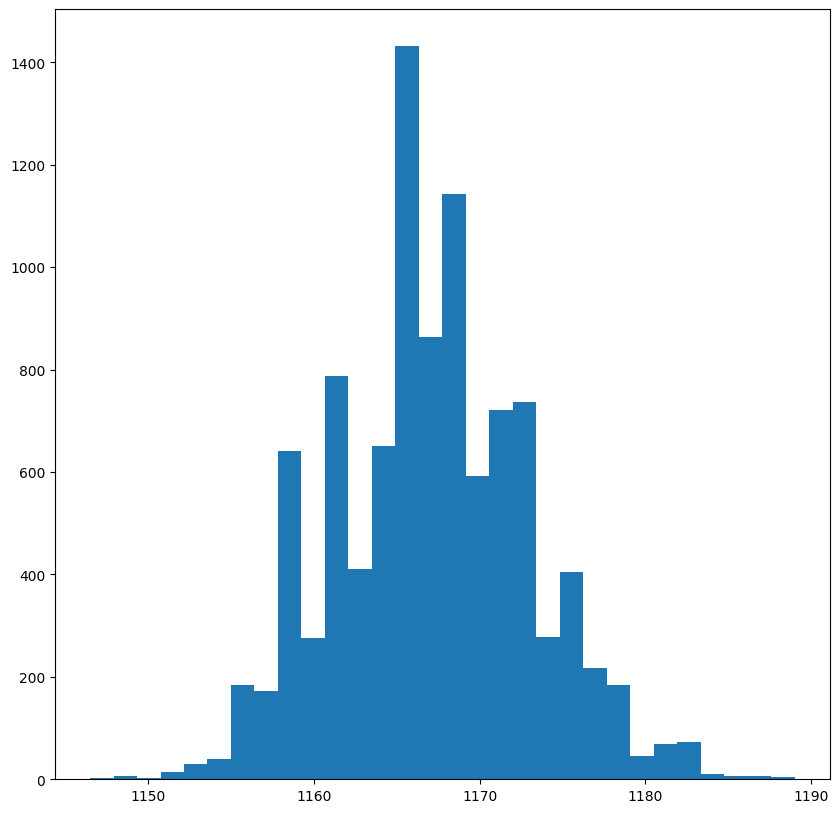

In [21]:
# Now visualize results
# Create a figure of size w=10 h=10 and an ax object to plot
fig,ax = plt.subplots(figsize=(10,10))
# Do the actual plotting now
ax.hist(l_np,bins=30)
plt.show()